In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [56]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.cluster = None
        self.visited = False

def euclidean_distance(p1, p2):
    return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5

def region_query(point, points, eps):
    neighbors = []
    for p in points:
        if euclidean_distance(point, p) <= eps:
            neighbors.append(p)
    return neighbors

def dbscan(points, eps, min_samples):
    clusters = []
    cluster_id = 0

    for p in points:
        if p.visited:
            continue
        p.visited = True

        neighbors = region_query(p, points, eps)

        if len(neighbors) < min_samples:
            p.cluster = -1  # Noise
        else:
            cluster_id += 1
            expand_cluster(p, neighbors, clusters, cluster_id, eps, min_samples)

    return clusters

def expand_cluster(point, neighbors, clusters, cluster_id, eps, min_samples):
    point.cluster = cluster_id
    cluster = [point]

    for neighbor in neighbors:
        if not neighbor.visited:
            neighbor.visited = True
            new_neighbors = region_query(neighbor, points, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)
        if neighbor.cluster is None:
            neighbor.cluster = cluster_id
            cluster.append(neighbor)

    clusters.append(cluster)

# Plot clusters
def plot_clusters(points, clusters):
    plt.figure(figsize=(8, 6))

    for cluster_id, cluster in enumerate(clusters):
        cluster_x = [point.x for point in cluster]
        cluster_y = [point.y for point in cluster]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_id + 1}')

    noise = [point for point in points if point.cluster == -1]
    noise_x = [point.x for point in noise]
    noise_y = [point.y for point in noise]
    plt.scatter(noise_x, noise_y, color='black', marker='x', label='Noise')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('DBSCAN Clustering')
    plt.show()

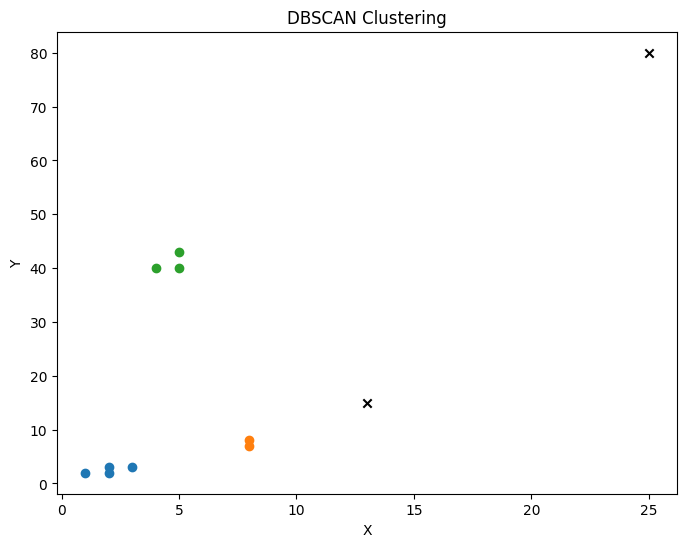

In [57]:
points = [Point(1, 2), Point(2, 2), Point(2, 3), Point(13,15),Point(8, 7), Point(8, 8), Point(25, 80) , Point(3,3) , Point(5,40) , Point(5,43),Point(4,40)]
eps = 3
min_samples = 2
clusters = dbscan(points, eps, min_samples)
plot_clusters(points, clusters)